In [1]:
!pip install plotly altair wordcloud seaborn nltk

In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt


from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud


In [3]:
detailed_df = pd.read_csv('/content/Detailed_Property.csv')
place_df = pd.read_csv('/content/property_by_place.csv')
reviews_df = pd.read_csv('/content/Property_Reviews.csv')


In [5]:
print(detailed_df.info())
print(place_df.info())
print(reviews_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Columns: 172 entries, title to sections.title.actionableIcon.subtitle
dtypes: bool(4), float64(89), int64(10), object(69)
memory usage: 651.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           500 non-null    int64  
 1   Unnamed: 0             500 non-null    int64  
 2   avgRating              423 non-null    float64
 3   listingBathroomLabel   500 non-null    object 
 4   bathrooms              500 non-null    float64
 5   listingBedLabel        496 non-null    object 
 6   bedrooms               500 non-null    int64  
 7   beds                   500 non-null    int64  
 8   businessHostLabel      0 non-null      float64
 9   city                   500 non-null    object 
 10  listingGuestLabel      500 non-null    obje

In [6]:
print(detailed_df.head())
print(place_df.head())
print(reviews_df.head())


                                               title        propertyType  \
0  Home in Calgary · ★4.95 · 1 bedroom · 1 bed · ...         Entire home   
1  Rental unit in Calgary · ★4.84 · Studio · 2 be...  Entire rental unit   
2  Guest suite in Calgary · ★4.94 · 1 bedroom · 1...  Entire guest suite   
3  Loft in Calgary · ★4.95 · 1 bedroom · 1 bed · ...         Entire loft   
4  Rental unit in Calgary · ★New · 1 bedroom · 1 ...  Entire rental unit   

  location  personCapacity descriptionLanguage  listingLat  listingLng  \
0  Calgary               2                  en   51.055354 -114.028776   
1  Calgary               3                  en   51.052710 -114.047400   
2  Calgary               2                  en   51.058770 -114.041540   
3  Calgary               2                  en   51.053650 -114.043120   
4  Calgary               2                  en   51.040940 -114.032850   

   homeTier         roomType  visibleReviewCount  ...  \
0         1  Entire home/apt             

print(detailed_df.isnull().sum())

numeric_columns = detailed_df.select_dtypes(include=['number']).columns
detailed_df[numeric_columns] = detailed_df[numeric_columns].fillna(detailed_df[numeric_columns].median())

detailed_df.fillna("", inplace=True)


In [8]:
# Check for missing values in 'detailed_df'
print(detailed_df.isnull().sum())

# Fill numeric columns with the median
numeric_columns = detailed_df.select_dtypes(include=['number']).columns
detailed_df[numeric_columns] = detailed_df[numeric_columns].fillna(detailed_df[numeric_columns].median())

# Fill text columns with empty strings
detailed_df.fillna("", inplace=True)


title                                               0
propertyType                                        0
location                                            0
personCapacity                                      0
descriptionLanguage                                 0
                                                   ..
sections.sleepingArrangement.arrangementDetails     0
sections.title.actionableIcon.accessibilityLabel    0
sections.title.actionableIcon.icon                  0
sections.title.actionableIcon.title                 0
sections.title.actionableIcon.subtitle              0
Length: 172, dtype: int64


In [9]:
print(place_df.isnull().sum())
numeric_columns_place = place_df.select_dtypes(include=['number']).columns
place_df[numeric_columns_place] = place_df[numeric_columns_place].fillna(place_df[numeric_columns_place].median())
place_df.fillna("", inplace=True)

# Handle missing values in 'reviews_df'
print(reviews_df.isnull().sum())
reviews_df.fillna("", inplace=True)


Unnamed: 0.1               0
Unnamed: 0                 0
avgRating                 77
listingBathroomLabel       0
bathrooms                  0
listingBedLabel            4
bedrooms                   0
beds                       0
businessHostLabel        500
city                       0
listingGuestLabel          0
id                         0
isAutoTranslated           0
isNewListing               0
isSuperhost                0
relaxedFilterLabels      500
localizedCityName          0
localizedDistanceText    500
locationTitle            500
locationContext          500
listingName                0
listingObjType             0
neighborhood             500
previewTags                0
publicAddress              0
reviewsCount               0
roomType                   0
roomTypeCategory           0
roomTypeId               500
spaceType                  0
starRating                77
title                      0
avgRatingLocalized        10
accessibilityLabel         0
price         

<ipython-input-9-b10c1ad5b920>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  place_df.fillna("", inplace=True)
<ipython-input-9-b10c1ad5b920>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  reviews_df.fillna("", inplace=True)


In [40]:
# Convert 'rating' to numeric
final_df['rating'] = pd.to_numeric(final_df['rating'], errors='coerce')

# Calculate average rating per property
final_df['avg_rating'] = final_df.groupby('property_id')['rating'].transform('mean')


In [42]:

final_df["price"] = final_df["price"].astype(str)


final_df["price"] = final_df["price"].str.replace(r"[^\d.]", "", regex=True)


final_df["price"] = pd.to_numeric(final_df["price"], errors="coerce")

# Check data type
print("Data type of 'price':", final_df["price"].dtype)


Data type of 'price': int64


In [11]:

detailed_df['propertyType'] = detailed_df['propertyType'].str.lower()

detailed_df.drop_duplicates(inplace=True)
place_df.drop_duplicates(inplace=True)
reviews_df.drop_duplicates(inplace=True)


Mage

In [12]:

merged_df = pd.merge(detailed_df, reviews_df, on='property_id', how='left')

merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

merged_df.rename(columns={'location': 'city'}, inplace=True)

final_df = pd.merge(merged_df, place_df, on='city', how='left')


In [43]:
#  'price' to string
final_df["price"] = final_df["price"].astype(str)

# Remove non-numeric characters from 'price'
final_df["price"] = final_df["price"].str.replace(r"[^\d.]", "", regex=True)

# Convert 'price' to numeric
final_df["price"] = pd.to_numeric(final_df["price"], errors="coerce")

# Check data type
print("Data type of 'price':", final_df["price"].dtype)


Data type of 'price': int64


In [44]:
final_df["price"] = final_df["price"].astype(str)

# Remove non-numeric characters from 'price'
final_df["price"] = final_df["price"].str.replace(r"[^\d.]", "", regex=True)

# Convert 'price' to numeric
final_df["price"] = pd.to_numeric(final_df["price"], errors="coerce")

# Check data type
print("Data type of 'price':", final_df["price"].dtype)


Data type of 'price': int64


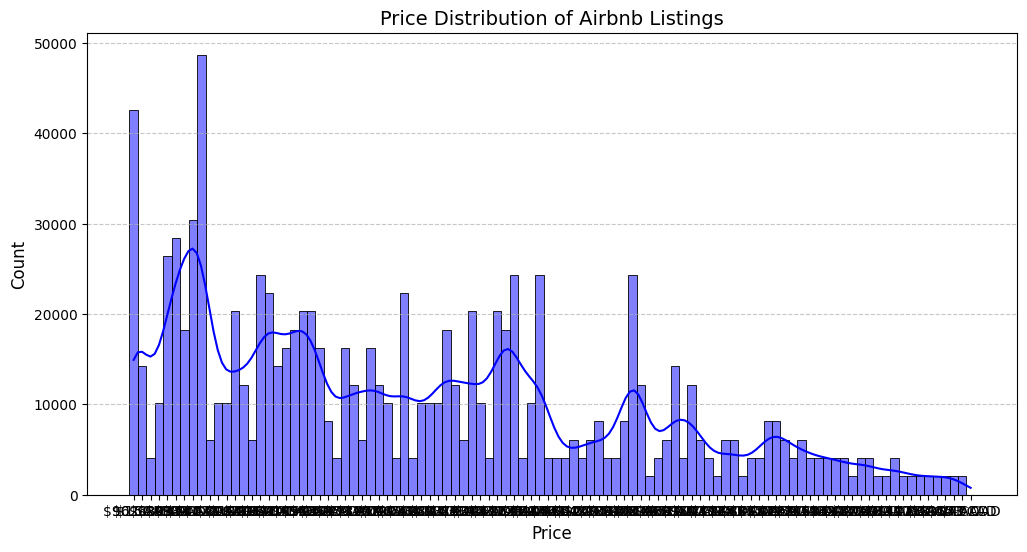

In [13]:
# price      distribution
plt.figure(figsize=(12, 6))
sns.histplot(final_df['price'], bins=40, kde=True, color='blue', edgecolor='black')
plt.title("Price Distribution of Airbnb Listings", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Average Price by City

<ipython-input-45-6f90b0da17a6>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




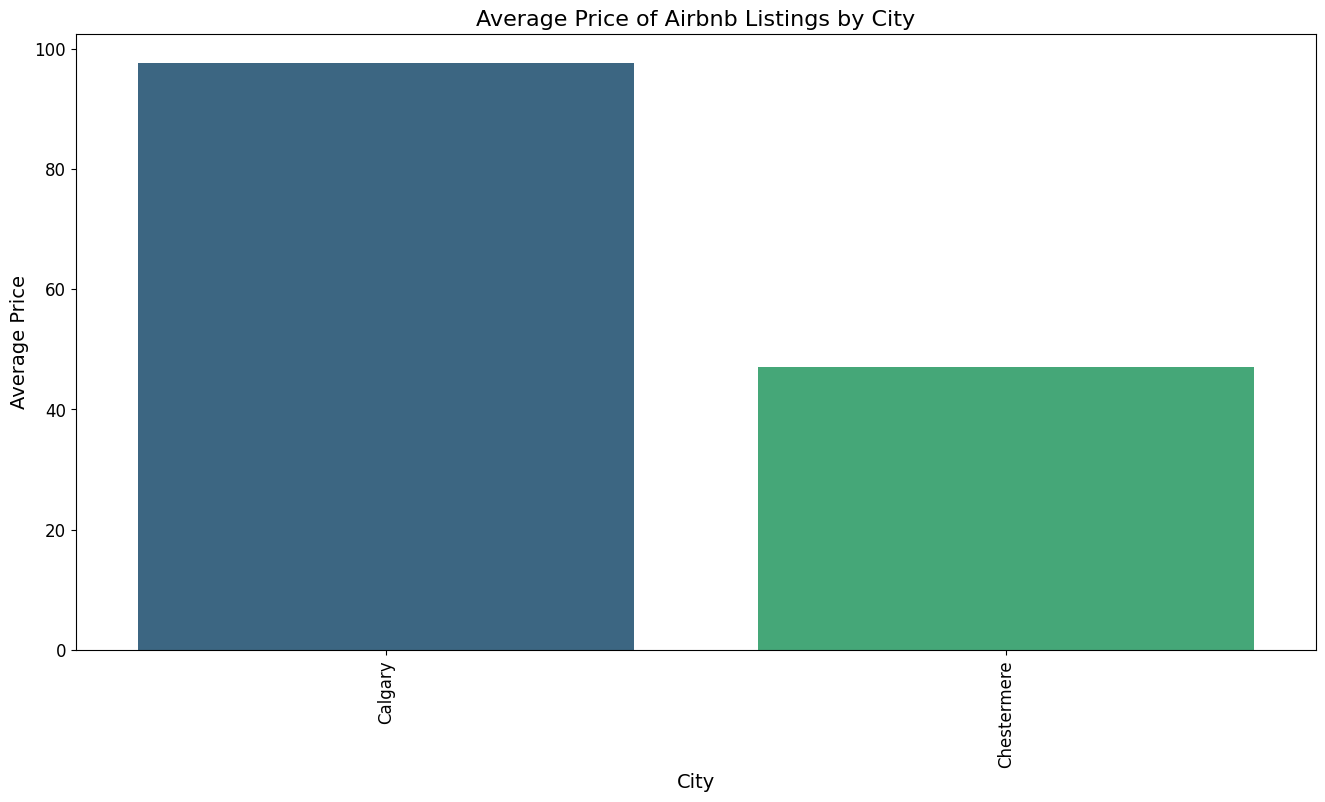

In [45]:
# Calculate average price per city
city_avg_price = final_df.groupby('city')['price'].mean().sort_values(ascending=False).reset_index()

# Plot average price by city
plt.figure(figsize=(16,8))
sns.barplot(data=city_avg_price.head(20), x='city', y='price', palette='viridis')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average Price of Airbnb Listings by City", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.show()


. Average Price by Property Type

<ipython-input-47-decdd6ed554d>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




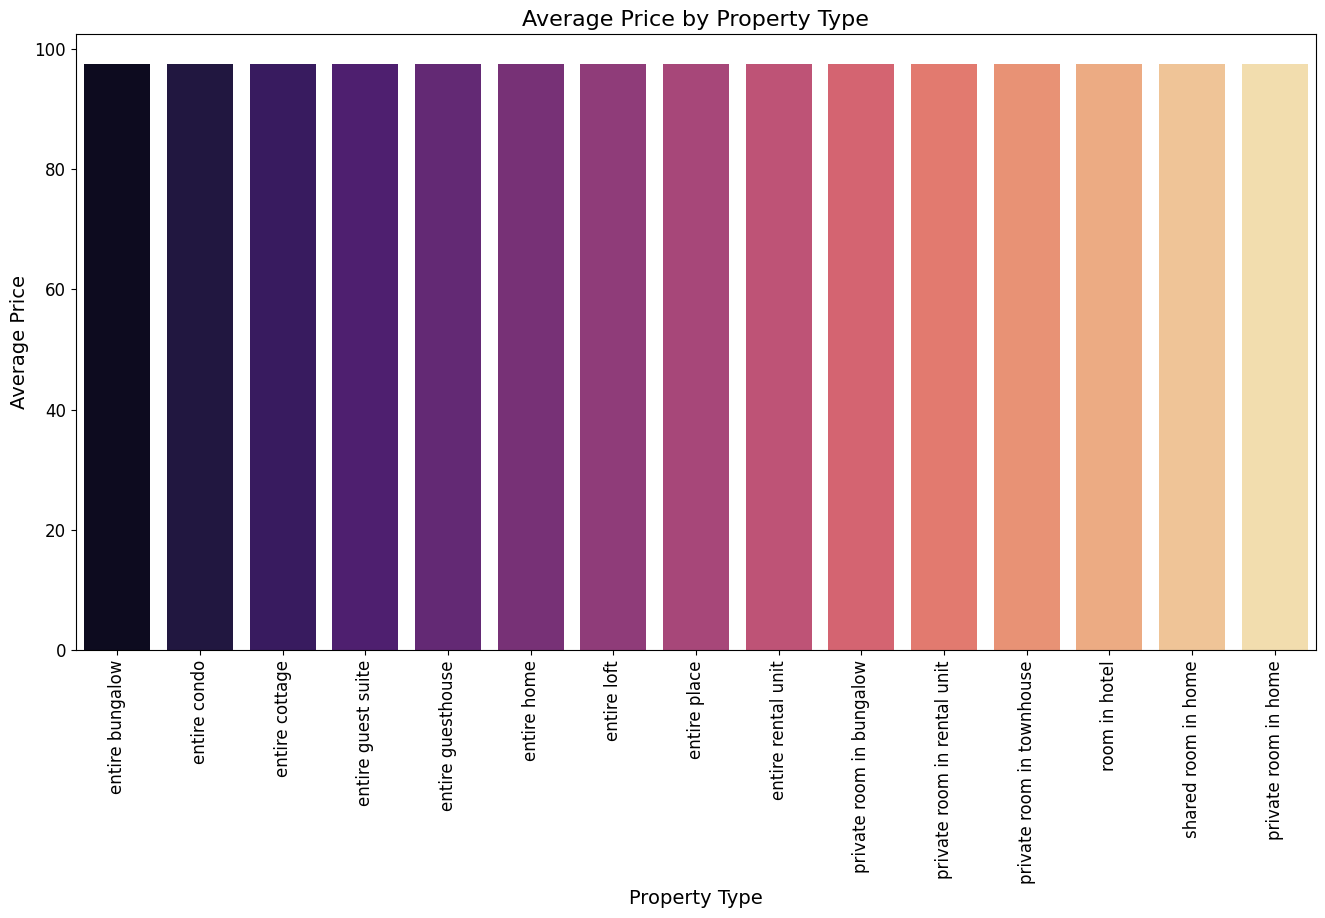

In [47]:
# average price per property type
property_revenue = final_df.groupby('propertyType')['price'].mean().sort_values(ascending=False).reset_index()

# avg price by property type
plt.figure(figsize=(16,8))
sns.barplot(data=property_revenue.head(20), x='propertyType', y='price', palette='magma')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average Price by Property Type", fontsize=16)
plt.xlabel("Property Type", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.show()

#Shows which property types generate the most revenue, helpful for hosts considering property investments.

# Common Words in Reviews (Word Cloud)**bold text**

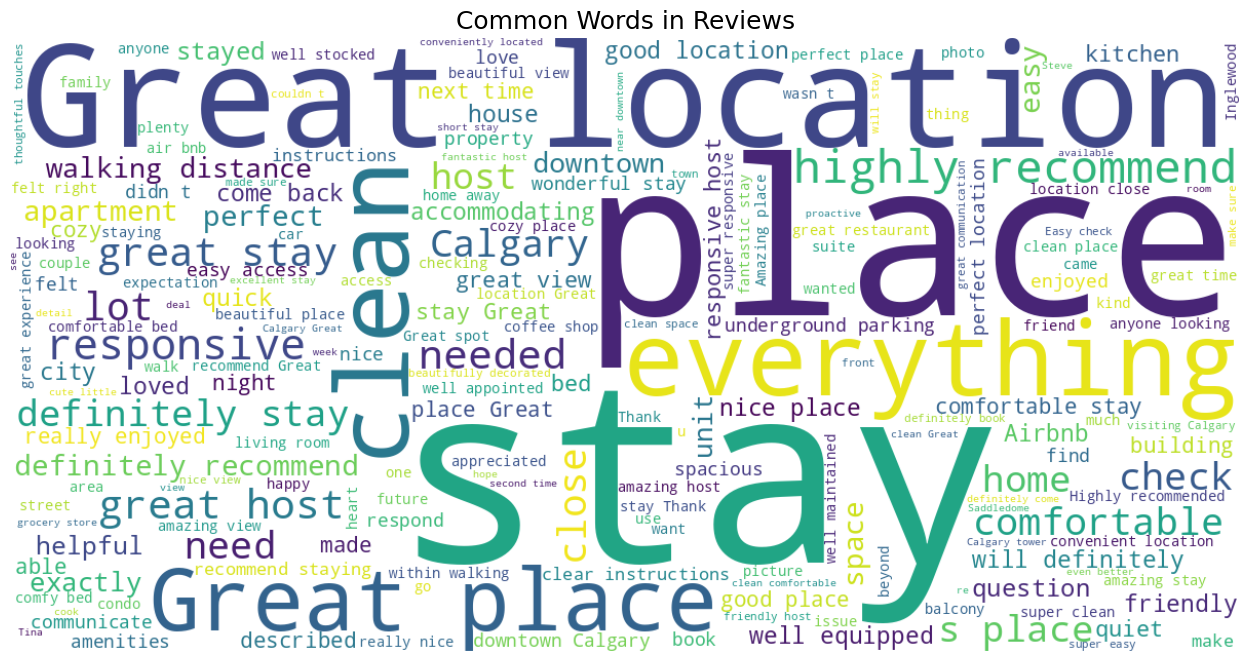

In [48]:
# Combine all reviews into one string
all_reviews = " ".join(final_df['disclaimer'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Reviews", fontsize=18)
plt.show()


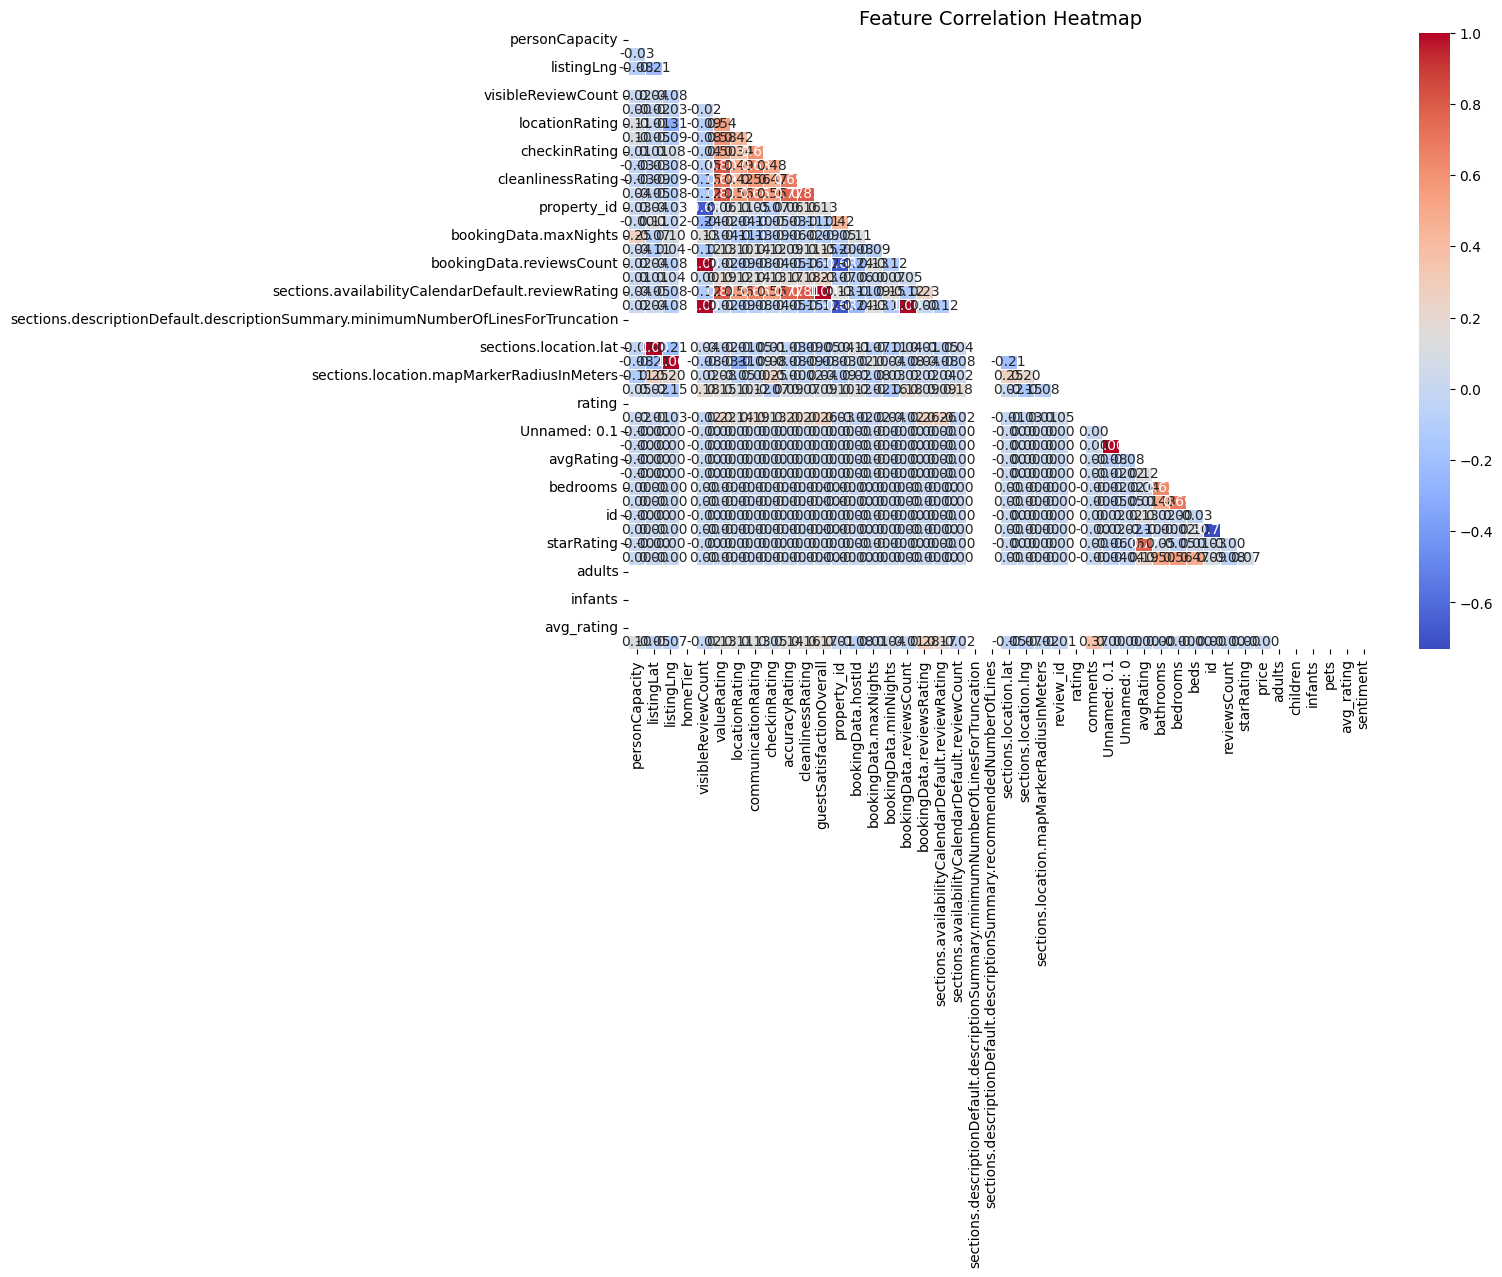

In [50]:
numeric_cols = final_df.select_dtypes(include=['number'])

if not numeric_cols.empty:
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(numeric_cols.corr(), dtype=bool))

    # Generate heatmap
    sns.heatmap(numeric_cols.corr().round(2), annot=True, cmap="coolwarm", fmt=".2f",
                mask=mask, linewidths=0.5, annot_kws={"size": 10})
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()
else:
    print("No numeric columns available for correlation.")


In [52]:

final_df["price"] = final_df["price"].astype(str)

final_df["price"] = final_df["price"].str.replace(r"[^\d.]", "", regex=True)


final_df["price"] = pd.to_numeric(final_df["price"], errors="coerce")


print(final_df["price"].dtype)


int64


In [53]:
# average price per city
city_avg_price = final_df.groupby('city')['price'].mean().sort_values(ascending=False)

# top 10 cities
print(city_avg_price.head(10))


city
Calgary        97.527054
Chestermere    47.000000
Name: price, dtype: float64


In [54]:

property_revenue = final_df.groupby('propertyType')['price'].mean().sort_values(ascending=False)

print(property_revenue)


propertyType
entire bungalow                97.527054
entire condo                   97.527054
entire cottage                 97.527054
entire guest suite             97.527054
entire guesthouse              97.527054
entire home                    97.527054
entire loft                    97.527054
entire place                   97.527054
entire rental unit             97.527054
private room in bungalow       97.527054
private room in rental unit    97.527054
private room in townhouse      97.527054
room in hotel                  97.527054
shared room in home            97.527054
private room in home           97.518823
Name: price, dtype: float64


In [55]:

final_df['rating'] = pd.to_numeric(final_df['rating'], errors='coerce')

final_df['avg_rating'] = final_df.groupby('property_id')['rating'].transform('mean')


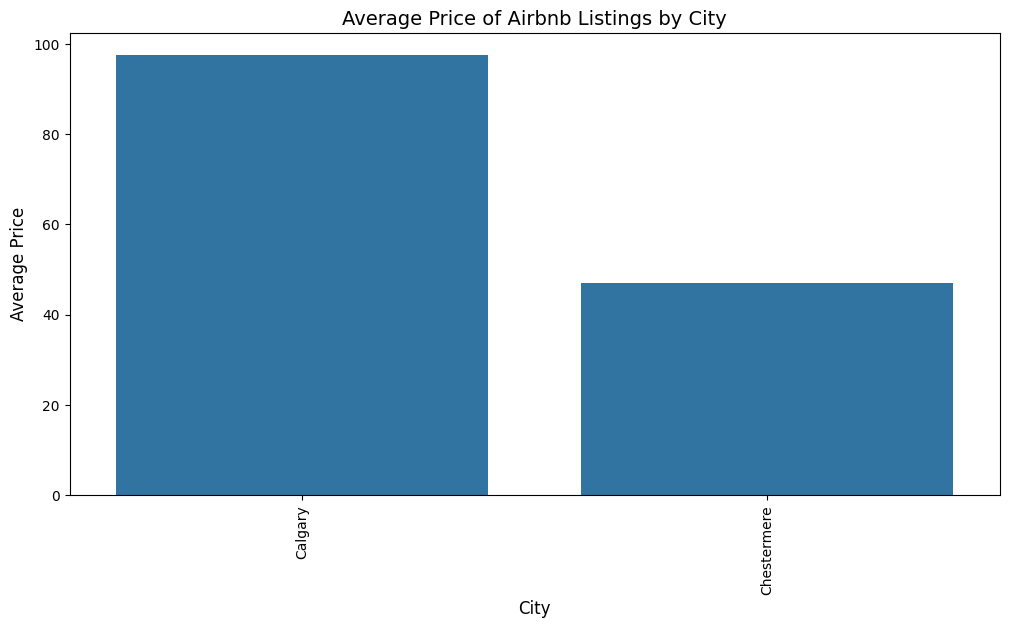

In [56]:
city_avg_price = city_avg_price.reset_index()

# average price by city
plt.figure(figsize=(12, 6))
sns.barplot(data=city_avg_price, x='city', y='price')
plt.xticks(rotation=90)
plt.title("Average Price of Airbnb Listings by City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.show()


In [ ]:
# Interactive scatter plot of latitude vs. longitude colored by price
fig = px.scatter(final_df, x='listingLng', y='listingLat', color='price',
                 title='Geographical Distribution of Prices',
                 labels={'listingLng': 'Longitude', 'listingLat': 'Latitude', 'price': 'Price'},
                 hover_data=['city', 'propertyType'])
fig.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


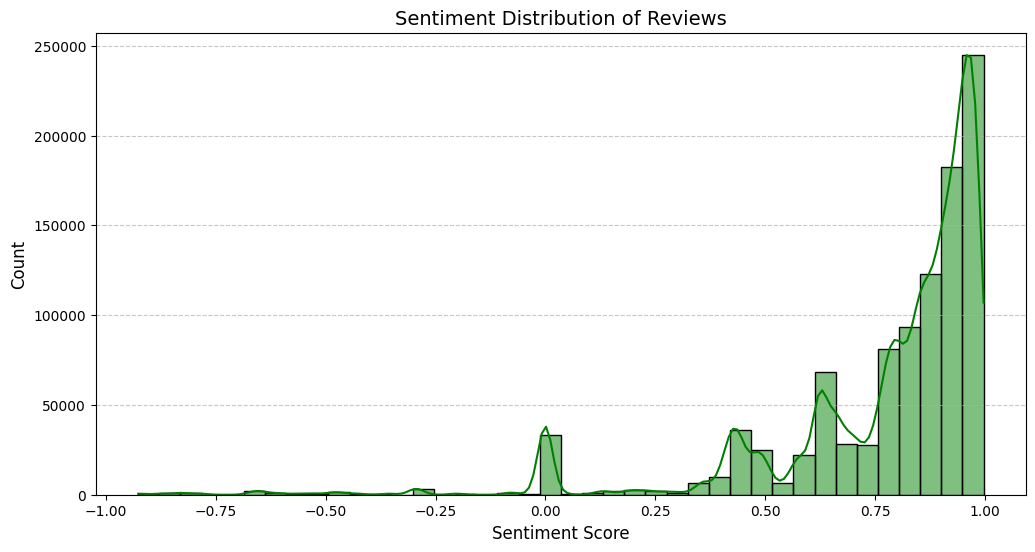

In [28]:
# Download NLTK data
nltk.download('vader_lexicon')

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis on disclaimers/reviews
# Convert the 'disclaimer' column to string before applying sentiment analysis
final_df['sentiment'] = final_df['disclaimer'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(final_df['sentiment'], bins=40, kde=True, color='green', edgecolor='black')
plt.title("Sentiment Distribution of Reviews", fontsize=14)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insights


<ipython-input-33-99ebc69e4653>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




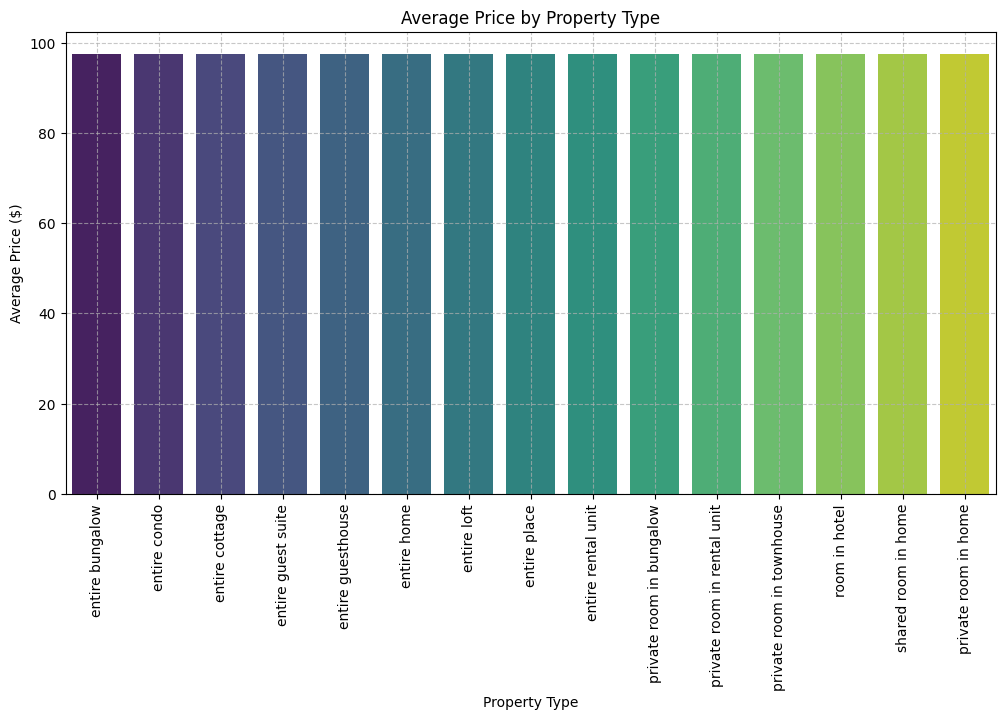

In [33]:
# Average price by property type
avg_price_by_type = final_df.groupby('propertyType')['price'].mean().reset_index()

# Sort by average price
avg_price_by_type = avg_price_by_type.sort_values(by='price', ascending=False)

# Plot: Average price by property type
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_by_type, x='propertyType', y='price', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-34-99ebc69e4653>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




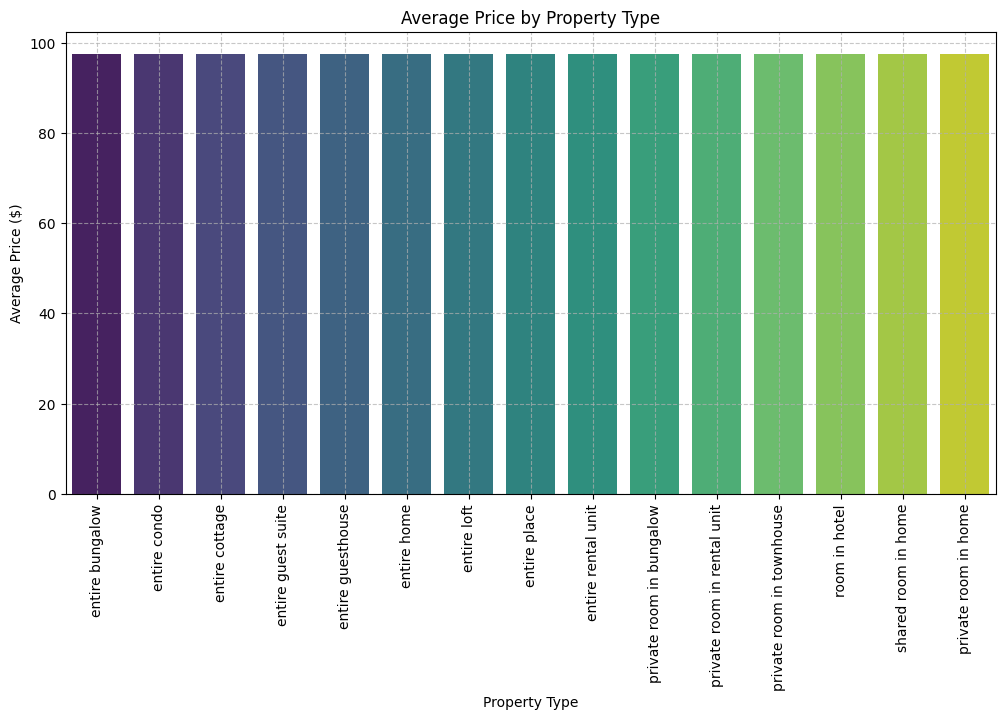

In [34]:
# Average price by property type
avg_price_by_type = final_df.groupby('propertyType')['price'].mean().reset_index()

# Sort by average price
avg_price_by_type = avg_price_by_type.sort_values(by='price', ascending=False)

# Plot: Average price by property type
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_by_type, x='propertyType', y='price', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-35-7451277b61e4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




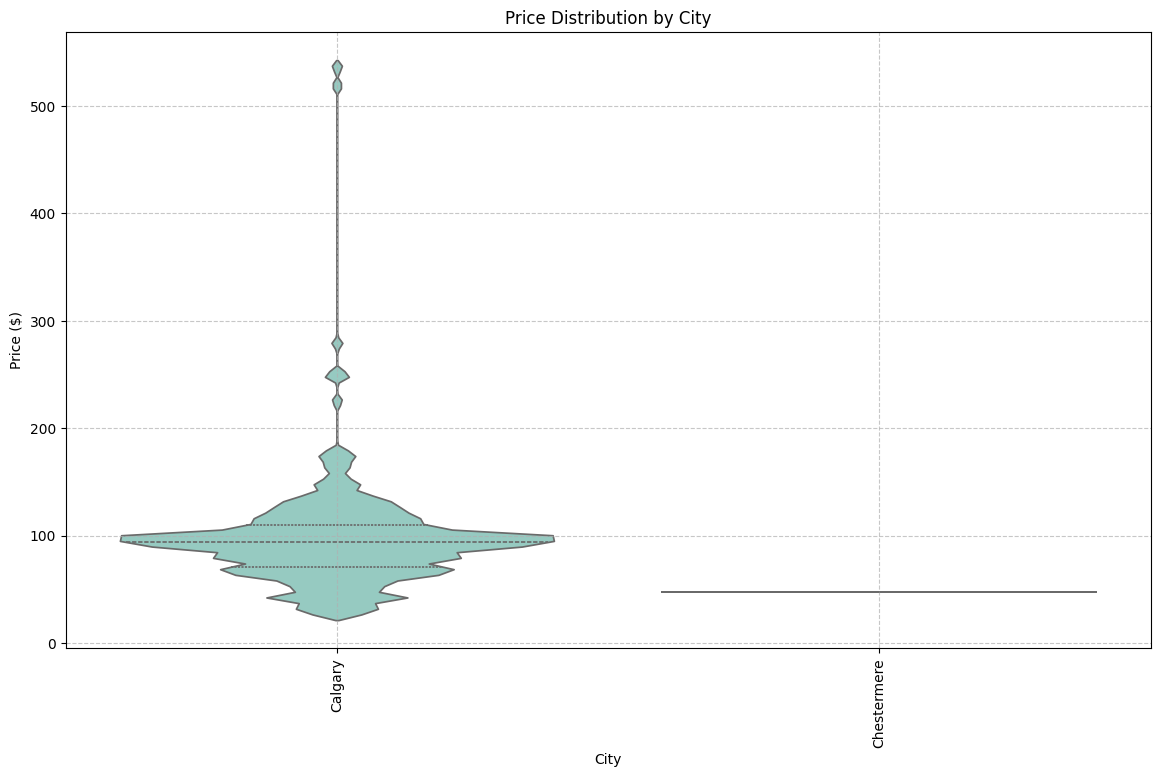

In [35]:
# Violin plot of price distribution by city
plt.figure(figsize=(14,8))
sns.violinplot(data=final_df, x='city', y='price', inner='quartile', palette='Set3')
plt.xticks(rotation=90)
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Price ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


By analyzing the Airbnb data from both host and user perspectives, we've uncovered valuable insights:

Hosts can enhance their listings by investing in amenities, focusing on property types that yield higher revenue, maintaining high guest satisfaction for better reviews, and strategically setting prices based on location data.

Users can find the best properties by identifying listings that offer great value, prioritizing highly rated properties, seeking listings with desired amenities, and choosing destinations that promise positive experiences.
